# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №5 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 14 мая 2018, 18:00 <br\>
**Штраф за опоздание:** -3 балла после 06:00 17 мая, -6 балла после 06:00 24 мая, -9 баллов после 06:00 31 мая

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw5.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (5 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (3 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (5 балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (2 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [153]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
from tqdm import tqdm
#import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

%load_ext pycodestyle_magic

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1.	Авдюнина Полина
2.	Авилова Екатерина
3.	Акентьева Анна
4.	Акиньщиков Алексей
5.	Аладушкин Данил
6.	Алекберов  Ибрагим
7.	Анисимова Мария
8.	Анненков Сергей
9.	Баянов Виктор
10.	Болычев Антон
11.	Бучкин Александр
12.	Господинов Георгий
13.	Гультиков Никита
14.	Даниелян Сурен
15.	Димов Илья
16.	Доронин Роман
17.	Евстифеев Степан
18.	Жирнов Михаил
19.	Жиянов Антон
20.	Иванов Илья
21.	Ивушкин Алексей
22.	Имеев Мерген
23.	Кононов Сергей
24.	Константиновский Борис
25.	Котелевский Никита
26.	Кочура Кирилл
27.	Кузнецов Алексей
28.	Кузьмин Сергей
29.	Кулагин Алексей
30.	Малков Кирилл
31.	Мальцев Александр
32.	Матюшин Максим
33.	Мокроусов Илья
34.	Мольков Егор
35.	Окладников Сергей
36.	Павлов Вячеслав
37.	Павлов Евгений
38.	Пащенко Александр
39.	Петренко Сергей
40.	Пиджакова Анна
41.	Пилипенко Никита
42.	Пропажин Артём
43.	Пшеничный Николай
44.	Радченко Руслан
45.	Рябинин Михаил
46.	Секретарев Тихон
47.	Сенотов Валерий
48.	Сивков Антон
49.	Сидоренко Артур
50.	Сильниченко Игорь
51.	Слабоузова Анна
52.	Слепов Николай
53.	Соколова Ксения
54.	Торосян Армине
55.	Трунин Александр
56.	Федотова Алёна
57.	Холин Роман
58.	Храмов Алексей
59.	Чернышёв Александр
60.	Шляпин Илья
61.	Шмурак Денис
62.	Шпитальник Александр
63.	Щеголев Всеволод

In [186]:
N = 10 # put your index here

In [187]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print ("Реализуем алгоритм кластеризации '%s'" % my_algorithm)

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [171]:
#%%pycodestyle

# Задание 1
from sklearn.base import BaseEstimator, ClusterMixin
from scipy.spatial.distance import cdist


class Clustering(BaseEstimator, ClusterMixin):
    def __init__(self, k=2, linkage='average', metric='euclidean',  **kwargs):
        self.metric = metric

        if linkage == 'average':
            self.dist = self.average_linkage
            self.predict_dist = np.mean

        if linkage == 'single':
            self.dist = self.single_linkage
            self.predict_dist = np.min

        if linkage == 'complete':
            self.dist = self.complete_linkage
            self.predict_dist = np.max

        self.k = k

        return

    def average_linkage(self, pair_dist, cluster_1, cluster_2):
        return np.mean(pair_dist[cluster_1][:, cluster_2])

    def single_linkage(self, pair_dist, cluster_1, cluster_2):
        return np.min(pair_dist[cluster_1][:, cluster_2])

    def complete_linkage(self, pair_dist, cluster_1, cluster_2):
        return np.max(pair_dist[cluster_1][:, cluster_2])

    def fit(self, x, y=None):
        self.x_len = len(x)
        pair_dist = cdist(x, x, metric=self.metric)
        cluster_dist = pair_dist.copy()

        clusters = list()
        for i in range(self.x_len):
            clusters.append([i])

        C = self.x_len
        while C > self.k:
            dist_copy = cluster_dist.copy()
            dist_copy[np.triu(np.ones((C, C), dtype=bool), 1) ^ True] = np.inf
            argmin = dist_copy.argmin()
            id_i, id_j = np.unravel_index(argmin, dist_copy.shape)

            clusters[id_i] += clusters[id_j]
            del clusters[id_j]
            ids_to_save = list(range(C))
            del ids_to_save[id_j]
            C -= 1

            cluster_dist = cluster_dist[ids_to_save, :][:, ids_to_save]

            for i in range(C):
                value = self.dist(pair_dist, clusters[id_i], clusters[i])
                cluster_dist[id_i, i] = cluster_dist[i, id_i] = value

        self.clusters = list()
        for cluster in clusters:
            self.clusters.append(x[cluster])

        return

    def predict(self, x):
        min_distances = np.empty(x.shape[0])
        min_distances = np.inf
        predicted = np.zeros(x.shape[0])
        for i, cluster in enumerate(self.clusters):
            dist_x_to_cluster = cdist(x, cluster, metric=self.metric)
            distances = self.predict_dist(dist_x_to_cluster, axis=1)
            predicted = np.where(min_distances > distances, i, predicted)
            min_distances = np.where(min_distances > distances,
                                     distances, min_distances)

        return np.array(predicted, dtype=int)

    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

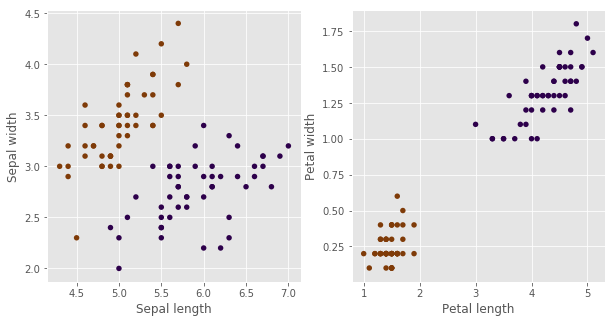

In [165]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [166]:
pred_iris = Clustering(K=2, metric='correlation', linkage='average').fit_predict(x_iris)
print ("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris))

Adjusted Rand index for iris is: 1.00


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage 
from scipy.cluster.hierarchy import fcluster, cophenet


In [305]:
%%timeit
X = linkage(x_iris, method='average', metric='euclidean')
X = None

1000 loops, best of 3: 250 µs per loop


## Задание 2

Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [172]:
## Задание 2
# Silhouette
def quality(x, y, metric='euclidean'):
    pair_dist = cdist(x, x, metric=metric)
    s = np.empty(x.shape[0])
    for i in range(x.shape[0]):
        a_i = np.mean(pair_dist[i, :][y == y[i]])
        b_distances = list()
        for label in y[y != y[i]]:
            b_distances.append(np.mean(pair_dist[i, :][y == label]))
        b_i = min(b_distances)
        s[i] = (b_i - a_i) / max(a_i, b_i)
        
    
    return s.mean()

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

9it [00:23,  2.86s/it]


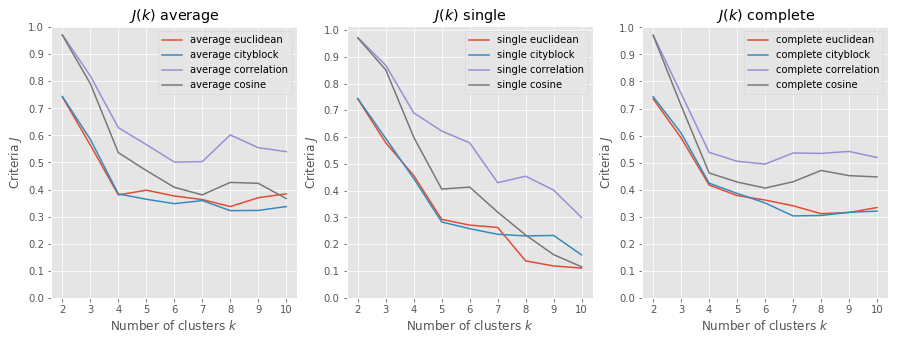

In [176]:
ks = range(2, 11)
criteria_avg = np.zeros(len(ks))
criteria_single = np.zeros(len(ks))
criteria_complete = np.zeros(len(ks))

metrics = ['euclidean', 'cityblock', 'correlation', 'cosine']
linkages = ['average', 'single', 'complete']

criteria = dict()
for linkage in linkages:
    for metric in metrics:
        criteria[linkage + ' ' + metric] = list()

for i, k in tqdm(enumerate(ks)):
    for linkage in linkages:
        for metric in metrics:
            cls = Clustering(k=k, linkage=linkage, metric=metric)
            y = cls.fit_predict(x_iris)
            criteria[linkage + ' ' + metric].append(quality(x_iris, y, metric=metric)) 

            

plt.figure(figsize=(15, 5))
    
for i, linkage in enumerate(linkages):
    plt.subplot(130 + i + 1)
    for metric in metrics:
        key = linkage + ' ' + metric
        plt.plot(ks, criteria[key], label=key)
    plt.legend()
    plt.xticks(ks)
    plt.yticks(np.linspace(0, 1, 11))
    plt.title("$J(k)$ " + linkage)
    plt.ylabel("Criteria $J$")
    plt.xlabel("Number of clusters $k$")
plt.show()

In [177]:
# Давайте сравним лучших из лучших
(criteria['average correlation'][0], criteria['single correlation'][0],
 criteria['complete correlation'][0], criteria['average cosine'][0], 
 criteria['single cosine'][0], criteria['complete cosine'][0])

(0.9716341350983861,
 0.9716341350983861,
 0.9716341350983861,
 0.970047935181541,
 0.970047935181541,
 0.970047935181541)

### Вывод

Самые лучшие показатели достигаются при ``k=2`` и ``metric='correlation'``. ``linkage`` роли не играет, что объяснимо: выборка хорошо разделимая. 

Но если всё же говорить о конкретике, то я бы остановился на следующем наборе параметров: <br>
``k=2, metric='correlation', linkage='average'``, <br>
так как данный набор показывает очень хорошие результаты (в сравнении с остальными случаями) даже при увеличении количества кластеров.

## Задание 3

In [83]:
## Задание 3
df = pd.DataFrame.from_csv("./WDI_csv/WDIData.csv")
df.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country Name,,,,,,,,,,,,,,,,,,,,,
Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.541696,74.507470,75.652712,76.628320,78.663736,77.439066,78.355520,78.743207,NaN,NaN


Посчитаем количество нанов в каждом году и выберем год с наименьшим количеством пропусков

In [628]:
cnt_nans = dict()
for i in range(1960, 2018):
    cnt_nans[i] = np.sum(df.loc[:, str(i)] == df.loc[:, str(i)])

In [629]:
max_year = np.argmax(list(cnt_nans.values())) + 1960
max_year, cnt_nans[max_year]

(2010, 236938)

Самым информативным оказался 2010 год. Будем работать только с ним. Отбросим лишние года и назовем столбцы удобным для дальнейшей работы образом. 

In [84]:
df = df.loc[:, ['Country Code', 'Indicator Name', 'Indicator Code', '2010']]
df = df.reset_index()
df.columns = ['Country_Name', 'Country_Code', 'Indicator_Name', 'Indicator_Code', 'Y2010']
df.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,Y2010
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,82.407647
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,86.136134
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,74.507470


Теперь надо оставить самые "информативные" признаки (то есть с наменьшим количеством нанов). Будем считать признак информативным, если он не является наном не менее чем у 95% стран. 

In [57]:
info_Names = list()
ind_names = np.unique(df.Indicator_Name)
len_countries = len(np.unique(df.Country_Name))
for name in tqdm(ind_names):
    curr_df = df[df.Indicator_Name == name]
    if np.sum(curr_df.Y2010 == curr_df.Y2010) >= 0.95 * len_countries:
        info_Names.append(name)

100%|██████████| 1591/1591 [01:04<00:00, 24.60it/s]


In [58]:
len(info_Names)

40

Получили 40 признаков. Оставим только их в датасете

In [85]:
mask = np.zeros(df.shape[0], dtype=bool)
for name in info_Names:
    mask = mask | np.array(df.Indicator_Name == name)
df = df[mask]

Продолжаем чистить данные. Выведем страны, у которых есть хотя бы какие-то пропуски.

In [86]:
few_info_countries = list()
countries = np.unique(df.Country_Name)
for country in countries:
    curr_df = df[df.Country_Name == country]
    if np.sum(curr_df.Y2010 == curr_df.Y2010) < len(info_Names): 
        few_info_countries.append((country, np.sum(curr_df.Y2010 == curr_df.Y2010)))

In [87]:
few_info_countries

[('American Samoa', 35),
 ('Andorra', 37),
 ('Bermuda', 39),
 ('British Virgin Islands', 36),
 ('Cayman Islands', 39),
 ('Central African Republic', 38),
 ('Chad', 38),
 ('Channel Islands', 28),
 ('Curacao', 27),
 ('Eritrea', 38),
 ('Faroe Islands', 39),
 ('French Polynesia', 39),
 ('Gibraltar', 31),
 ('Greenland', 39),
 ('Guam', 37),
 ('Hong Kong SAR, China', 37),
 ('Isle of Man', 27),
 ('Korea, Dem. People’s Rep.', 38),
 ('Kosovo', 17),
 ('Liechtenstein', 35),
 ('Luxembourg', 38),
 ('Macao SAR, China', 31),
 ('Marshall Islands', 34),
 ('Monaco', 26),
 ('Montenegro', 39),
 ('Nauru', 33),
 ('Northern Mariana Islands', 35),
 ('Not classified', 0),
 ('Pacific island small states', 39),
 ('San Marino', 33),
 ('Singapore', 39),
 ('Sint Maarten (Dutch part)', 20),
 ('South Sudan', 19),
 ('St. Kitts and Nevis', 38),
 ('St. Martin (French part)', 13),
 ('Turks and Caicos Islands', 36),
 ('Tuvalu', 34),
 ('Virgin Islands (U.S.)', 38),
 ('West Bank and Gaza', 37)]

Как видно, таковых, к счастью, не очень много. Оставим страны с малым количеством пропусков.

In [88]:
tmp = few_info_countries.copy()
for pair in few_info_countries:
    if pair[1] < 0.8 * len(info_Names):
        df = df[df.Country_Name != pair[0]]
        tmp.remove(pair)
few_info_countries = tmp

Посмотрим на названия индексов, по которым есть пропуски

In [89]:
for pair in few_info_countries:
    curr_df = df[df.Country_Name == pair[0]]
    print('\033[1m' + pair[0] +'\033[0m')
    mask = (curr_df.Y2010 == curr_df.Y2010) ^ True
    print(*list(curr_df[mask].Indicator_Name), sep='\n')
    print()

American Samoa
Access to electricity (% of population)
Access to electricity, urban (% of urban population)
Death rate, crude (per 1,000 people)
Mobile cellular subscriptions
Mobile cellular subscriptions (per 100 people)

Andorra
Capture fisheries production (metric tons)
Methane emissions (kt of CO2 equivalent)
Total fisheries production (metric tons)

Bermuda
Rural population growth (annual %)

British Virgin Islands
Access to electricity (% of population)
Access to electricity, urban (% of urban population)
Birth rate, crude (per 1,000 people)
Death rate, crude (per 1,000 people)

Cayman Islands
Rural population growth (annual %)

Central African Republic
Secure Internet servers
Secure Internet servers (per 1 million people)

Chad
Secure Internet servers
Secure Internet servers (per 1 million people)

Eritrea
Secure Internet servers
Secure Internet servers (per 1 million people)

Faroe Islands
Primary education, duration (years)

French Polynesia
Primary education, duration (years)

В некоторых странах нет данных по рождению и смерти. Безусловно, данные признаки очень важны. Предлагается отбросить страны, в которых нет данных по этим показателям

In [90]:
birth = 'Birth rate, crude (per 1,000 people)'
death = 'Death rate, crude (per 1,000 people)'

tmp = few_info_countries.copy()
for pair in few_info_countries:
    curr_df = df[df.Country_Name == pair[0]]
    nan_indexes = list(curr_df[True^(curr_df.Y2010 == curr_df.Y2010)].Indicator_Name)
    if (birth in nan_indexes) or (death in nan_indexes):
            df = df[df.Country_Name != pair[0]]
            tmp.remove(pair)

few_info_countries = tmp

Посмотрим, что осталось

In [91]:
for pair in few_info_countries:
    curr_df = df[df.Country_Name == pair[0]]
    print('\033[1m' + pair[0] +'\033[0m')
    mask = (curr_df.Y2010 == curr_df.Y2010) ^ True
    print(*list(curr_df[mask].Indicator_Name), sep='\n')
    print()

Andorra
Capture fisheries production (metric tons)
Methane emissions (kt of CO2 equivalent)
Total fisheries production (metric tons)

Bermuda
Rural population growth (annual %)

Cayman Islands
Rural population growth (annual %)

Central African Republic
Secure Internet servers
Secure Internet servers (per 1 million people)

Chad
Secure Internet servers
Secure Internet servers (per 1 million people)

Eritrea
Secure Internet servers
Secure Internet servers (per 1 million people)

Faroe Islands
Primary education, duration (years)

French Polynesia
Primary education, duration (years)

Greenland
Primary education, duration (years)

Guam
Mobile cellular subscriptions
Mobile cellular subscriptions (per 100 people)
Primary education, duration (years)

Hong Kong SAR, China
Forest area (% of land area)
Forest area (sq. km)
Rural population growth (annual %)

Korea, Dem. People’s Rep.
Secure Internet servers
Secure Internet servers (per 1 million people)

Liechtenstein
Capture fisheries productio

Посмотрев на данные показатели, можно со спокойной душой заполнить наны нулями (откуда, например, взяться метановым выбросам в Лихтеншнейне?)

In [93]:
df.fillna(0,inplace=True)

Последний шаг в чистке данных. Осталось развернуть таблицу удобным образом.

In [95]:
df = df.loc[:, ['Country_Name', 'Indicator_Name', 'Y2010']]
df = df.pivot(index='Country_Name', columns='Indicator_Name', values='Y2010')
df.head()

Indicator_Name,Access to electricity (% of population),"Access to electricity, urban (% of urban population)",Agricultural land (% of land area),Agricultural land (sq. km),Arable land (% of land area),Arable land (hectares per person),"Birth rate, crude (per 1,000 people)",Capture fisheries production (metric tons),"Death rate, crude (per 1,000 people)",Fixed telephone subscriptions,...,Rural population,Rural population (% of total population),Rural population growth (annual %),Secure Internet servers,Secure Internet servers (per 1 million people),Surface area (sq. km),Total fisheries production (metric tons),Urban population,Urban population (% of total),Urban population growth (annual %)
Country_Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,42.700000,82.800000,58.069111,379110.0,11.936709,0.270561,39.232,1000.0,8.095,16620.0,...,21691953.0,75.311,2.314596,20.0,0.694368,652860.0,2050.000,7111214.0,24.689,4.347280
Albania,100.000000,100.000000,43.843066,12013.0,22.846715,0.214897,11.819,5132.2,6.776,333066.0,...,1393502.0,47.837,-2.743291,27.0,9.268728,28750.0,7636.200,1519519.0,52.163,1.609373
Algeria,98.884972,99.505684,17.371334,413740.0,3.149798,0.207710,24.762,93463.0,4.754,2922731.0,...,11728841.0,32.474,-0.323370,31.0,0.858306,2381740.0,95221.742,24388796.0,67.526,2.869395
Andorra,100.000000,100.000000,42.063830,197.7,1.638298,0.009118,9.800,0.0,2.800,38171.0,...,10288.0,12.183,4.472573,78.0,923.634383,470.0,0.000,74161.0,87.817,-0.622377
Angola,33.514950,59.367783,46.835646,583900.0,3.288682,0.175445,45.314,310000.0,10.450,281122.0,...,13998811.0,59.903,2.246740,52.0,2.225158,1246700.0,310310.000,9370320.0,40.097,5.580344


In [132]:
print('\033[1mСписок признаков\033[0m')
print(*list(df.columns), sep='\n')

Список признаков
Access to electricity (% of population)
Access to electricity, urban (% of urban population)
Agricultural land (% of land area)
Agricultural land (sq. km)
Arable land (% of land area)
Arable land (hectares per person)
Birth rate, crude (per 1,000 people)
Capture fisheries production (metric tons)
Death rate, crude (per 1,000 people)
Fixed telephone subscriptions
Fixed telephone subscriptions (per 100 people)
Forest area (% of land area)
Forest area (sq. km)
International migrant stock (% of population)
International migrant stock, total
Land area (sq. km)
Methane emissions (kt of CO2 equivalent)
Mobile cellular subscriptions
Mobile cellular subscriptions (per 100 people)
Nitrous oxide emissions (% change from 1990)
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
People practicing open defecation (% of population)
People using at least basic drinking water services (% of population)
People using at least basic sanitation services (% of population)
Popul

In [96]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(df.values)

Предлагается разбивать страны от 4 до 8 кластеров. В самом деле, надо искать середину: стоит избегать больших и маленьких кластеров, потому что про них ничего однозначного сказать нельзя.

5it [01:07, 13.52s/it]


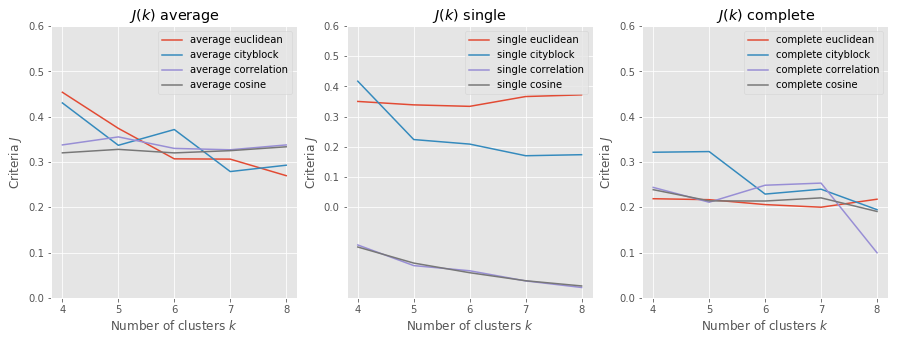

In [174]:
ks = range(4, 9)
criteria_avg = np.zeros(len(ks))
criteria_single = np.zeros(len(ks))
criteria_complete = np.zeros(len(ks))

metrics = ['euclidean', 'cityblock', 'correlation', 'cosine']
linkages = ['average', 'single', 'complete']

criteria = dict()
for linkage in linkages:
    for metric in metrics:
        criteria[linkage + ' ' + metric] = list()

for i, k in tqdm(enumerate(ks)):
    for linkage in linkages:
        for metric in metrics:
            cls = Clustering(k=k, linkage=linkage, metric=metric)
            y = cls.fit_predict(x)
            criteria[linkage + ' ' + metric].append(quality(x, y, metric=metric)) 

            

plt.figure(figsize=(15, 5))
    
for i, linkage in enumerate(linkages):
    plt.subplot(130 + i + 1)
    for metric in metrics:
        key = linkage + ' ' + metric
        plt.plot(ks, criteria[key], label=key)
    plt.legend()
    plt.xticks(ks)
    plt.yticks(np.linspace(0, 0.6, 7))
    plt.title("$J(k)$ " + linkage)
    plt.ylabel("Criteria $J$")
    plt.xlabel("Number of clusters $k$")
plt.show()

Как видно, лучшие показатели показали евклидова и манхетенские метрики. Действительно ли они хорошо работают? Давайте посмотрим на кластеризацию. 

In [110]:
cls = Clustering(k=4, metric='euclidean', linkage='average')
y = cls.fit_predict(x)

In [111]:
df.iloc[y==0].index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, RB', 'Vietnam',
       'Virgin Islands (U.S.)', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country_Name', length=236)

In [112]:
cls = Clustering(k=4, metric='cityblock', linkage='single')
y = cls.fit_predict(x)

In [113]:
df.iloc[y==0].index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, RB', 'Vietnam',
       'Virgin Islands (U.S.)', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country_Name', length=228)

Кластер с нулевым лейблом в обоих случаях собрал в себя больше 85% датафрейма! Вообще очень логично: евклидова (манхэтеннская) метрика не очень хорошо отражает степень похожести двух стран. Как минимум потому, что в датафрейме очень много абсолютных признаков (площадь, население и тд). Та же корреляция (или косинусное расстояние) должна лучше справляться с данной задачей, так как её можно интерпретировать как "меру похожести". 

Не считая евклидову и манхетенскую метрики, самые лучшие показатели продемонстрировала модель <br>
``k=5, metric='correlation', linkage='average'`` <br>

Посмотрим, как она работает. 

In [114]:
cls = Clustering(k=5, metric='correlation', linkage='average')
y = cls.fit_predict(x)

In [115]:
df.iloc[y==0].index

Index(['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Botswana',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Cote d'Ivoire', 'Djibouti', 'Equatorial Guinea',
       'Eritrea', 'Ethiopia', 'Fragile and conflict affected situations',
       'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Heavily indebted poor countries (HIPC)', 'IDA blend', 'IDA only',
       'IDA total', 'India', 'Kenya', 'Kiribati', 'Korea, Dem. People’s Rep.',
       'Least developed countries: UN classification', 'Lesotho', 'Liberia',
       'Low income', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria',
       'Other small states', 'Pakistan', 'Papua New Guinea',
       'Pre-demographic dividend', 'Rwanda', 'Sao Tome and Principe',
       'Senegal', 'Sierra Leone', 'Small states', 'Solomon Islands', 'Somalia',
       '

In [116]:
df.iloc[y==1].index

Index(['Belize', 'Bhutan', 'Bolivia', 'Brazil', 'Cabo Verde',
       'Caribbean small states', 'Colombia', 'Costa Rica', 'Ecuador', 'Fiji',
       'Gabon', 'Grenada', 'Guatemala', 'Guyana', 'Honduras', 'Indonesia',
       'Lao PDR', 'Micronesia, Fed. Sts.', 'Nicaragua', 'Panama', 'Paraguay',
       'Peru', 'Samoa', 'Seychelles', 'Sri Lanka', 'Suriname', 'Vietnam'],
      dtype='object', name='Country_Name')

In [117]:
df.iloc[y==2].index

Index(['Algeria', 'Arab World', 'Azerbaijan', 'Bahrain', 'Egypt, Arab Rep.',
       'Faroe Islands', 'French Polynesia', 'Greenland', 'Guam',
       'Iran, Islamic Rep.', 'Iraq', 'Israel', 'Jordan', 'Kuwait',
       'Kyrgyz Republic', 'Lebanon', 'Maldives', 'Middle East & North Africa',
       'Middle East & North Africa (IDA & IBRD countries)',
       'Middle East & North Africa (excluding high income)', 'Mongolia',
       'Morocco', 'New Caledonia', 'Oman', 'Pacific island small states',
       'Philippines', 'Qatar', 'Saudi Arabia', 'Syrian Arab Republic',
       'Tajikistan', 'Tonga', 'Turkmenistan', 'United Arab Emirates',
       'Uzbekistan', 'West Bank and Gaza'],
      dtype='object', name='Country_Name')

In [118]:
df.iloc[y==3].index

Index(['Albania', 'Andorra', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Bahamas, The', 'Barbados', 'Belarus',
       'Belgium', 'Bermuda', 'Bosnia and Herzegovina', 'Brunei Darussalam',
       'Bulgaria', 'Canada', 'Cayman Islands',
       'Central Europe and the Baltics', 'Chile', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominica', 'Dominican Republic',
       'El Salvador', 'Estonia', 'Euro area', 'European Union', 'Finland',
       'France', 'Georgia', 'Germany', 'Greece', 'Hong Kong SAR, China',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Korea, Rep.', 'Latvia', 'Libya', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Macedonia, FYR', 'Malaysia', 'Malta',
       'Mauritius', 'Mexico', 'Moldova', 'Montenegro', 'Netherlands',
       'New Zealand', 'North America', 'Norway', 'Palau', 'Poland', 'Portugal',
       'Puerto Rico', 'Romania', 'Russian Federation', 'San M

In [119]:
df.iloc[y==4].index

Index(['China', 'Early-demographic dividend', 'East Asia & Pacific',
       'East Asia & Pacific (IDA & IBRD countries)',
       'East Asia & Pacific (excluding high income)', 'Europe & Central Asia',
       'Europe & Central Asia (IDA & IBRD countries)',
       'Europe & Central Asia (excluding high income)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Low & middle income', 'Lower middle income', 'Middle income',
       'OECD members', 'Post-demographic dividend', 'Upper middle income',
       'World'],
      dtype='object', name='Country_Name')

In [120]:
from sklearn.manifold import TSNE

In [121]:
x_tsne = TSNE(n_components=2, metric='correlation').fit_transform(x)

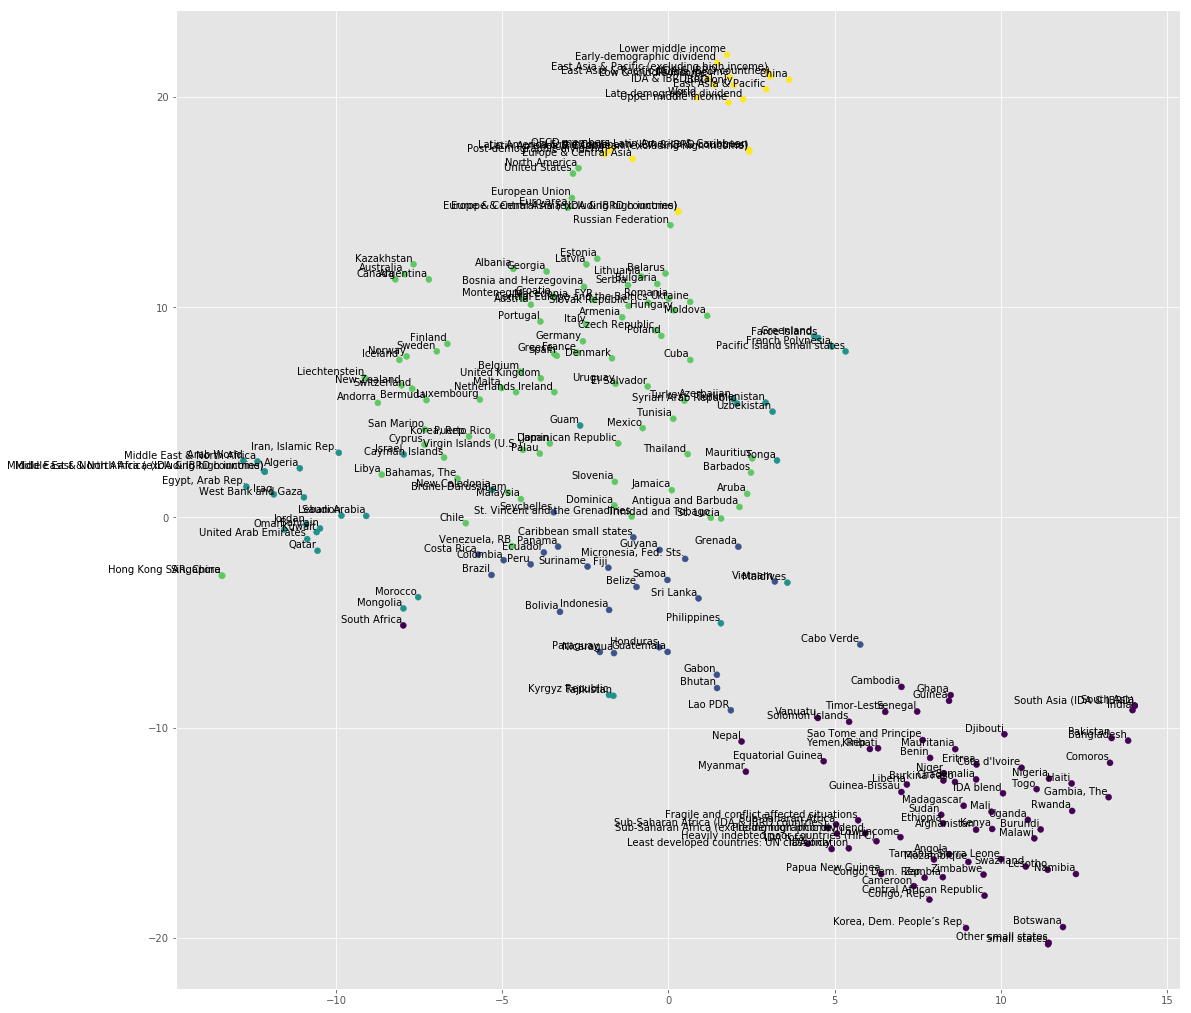

In [126]:
countries = list(df.index)
plt.figure(figsize=(18, 18))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y)
for label, i, j in zip(countries, x_tsne[:, 0], x_tsne[:, 1]):
    plt.annotate(
        label,
        xy=(i, j), xytext=(-1, 1),
        textcoords='offset points', ha='right', va='bottom',
    )

plt.show()

## Задание 4

In [142]:
## Задание 4

In [143]:
df['label'] = y
df.groupby(by='label').mean().T

label,0,1,2,3,4
Indicator_Name,,,,,
Access to electricity (% of population),3.788027e+01,8.779323e+01,9.630706e+01,9.929224e+01,9.303745e+01
"Access to electricity, urban (% of urban population)",6.702205e+01,9.663323e+01,9.905626e+01,9.960919e+01,9.819912e+01
Agricultural land (% of land area),4.631520e+01,2.479613e+01,3.201143e+01,3.700459e+01,3.849686e+01
Agricultural land (sq. km),1.447372e+06,1.868184e+05,5.152162e+05,3.241595e+05,1.581022e+07
Arable land (% of land area),1.508482e+01,6.882705e+00,6.862731e+00,1.783992e+01,1.081490e+01
Arable land (hectares per person),2.000078e-01,1.697312e-01,1.037233e-01,2.673135e-01,2.411174e-01
"Birth rate, crude (per 1,000 people)",3.491798e+01,2.162880e+01,2.230219e+01,1.281463e+01,1.648242e+01
Capture fisheries production (metric tons),1.311729e+06,5.650396e+05,4.679456e+05,5.839016e+05,3.198107e+07
"Death rate, crude (per 1,000 people)",9.715066e+00,6.242719e+00,4.966378e+00,8.520707e+00,7.777472e+00


Итак, рассмотрим страны, которые попали в нулевой кластер. 

In [129]:
print('\033[1m' + 'label=0' +'\033[0m')
df.iloc[y==0].index

label=0


Index(['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Botswana',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Cote d'Ivoire', 'Djibouti', 'Equatorial Guinea',
       'Eritrea', 'Ethiopia', 'Fragile and conflict affected situations',
       'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Heavily indebted poor countries (HIPC)', 'IDA blend', 'IDA only',
       'IDA total', 'India', 'Kenya', 'Kiribati', 'Korea, Dem. People’s Rep.',
       'Least developed countries: UN classification', 'Lesotho', 'Liberia',
       'Low income', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria',
       'Other small states', 'Pakistan', 'Papua New Guinea',
       'Pre-demographic dividend', 'Rwanda', 'Sao Tome and Principe',
       'Senegal', 'Sierra Leone', 'Small states', 'Solomon Islands', 'Somalia',
       '

Сюда попали почти все бедные страны Африки, некоторые страны из средней и южной Азии. В основном все страны с плохим уровнем жизни. Этот кластер явно выделяется на приведенном выше графике. Довольно малый процент людей (в среднем) имеет доступ к электричеству, к интернету, соблюдает гигиену и имеет доступ к нормальным водным ресурсам.

In [148]:
print('\033[1m' + 'label=1' +'\033[0m')
df.iloc[y==1].index

label=1


Index(['Belize', 'Bhutan', 'Bolivia', 'Brazil', 'Cabo Verde',
       'Caribbean small states', 'Colombia', 'Costa Rica', 'Ecuador', 'Fiji',
       'Gabon', 'Grenada', 'Guatemala', 'Guyana', 'Honduras', 'Indonesia',
       'Lao PDR', 'Micronesia, Fed. Sts.', 'Nicaragua', 'Panama', 'Paraguay',
       'Peru', 'Samoa', 'Seychelles', 'Sri Lanka', 'Suriname', 'Vietnam'],
      dtype='object', name='Country_Name')

В данный кластер попали в основном страны Центральной Латинской Америки и страны из остальных тропических уголков планеты. Я бы охарактеризовал данный кластер следующим образом: тропические страны (в основном центрально-американские) со средним уровнем жизни. Данные страны имеют очень похожие географические и экономические показатели, поэтому и попали в один кластер. 

In [149]:
print('\033[1m' + 'label=2' +'\033[0m')
df.iloc[y==2].index

label=2


Index(['Algeria', 'Arab World', 'Azerbaijan', 'Bahrain', 'Egypt, Arab Rep.',
       'Faroe Islands', 'French Polynesia', 'Greenland', 'Guam',
       'Iran, Islamic Rep.', 'Iraq', 'Israel', 'Jordan', 'Kuwait',
       'Kyrgyz Republic', 'Lebanon', 'Maldives', 'Middle East & North Africa',
       'Middle East & North Africa (IDA & IBRD countries)',
       'Middle East & North Africa (excluding high income)', 'Mongolia',
       'Morocco', 'New Caledonia', 'Oman', 'Pacific island small states',
       'Philippines', 'Qatar', 'Saudi Arabia', 'Syrian Arab Republic',
       'Tajikistan', 'Tonga', 'Turkmenistan', 'United Arab Emirates',
       'Uzbekistan', 'West Bank and Gaza'],
      dtype='object', name='Country_Name')

В основном страны Ближайшего Востока и Северной Африки. Много Арабских стран. Данные страны похожие размеры и географические особенности.

In [150]:
print('\033[1m' + 'label=3' +'\033[0m')
df.iloc[y==3].index

label=3


Index(['Albania', 'Andorra', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Bahamas, The', 'Barbados', 'Belarus',
       'Belgium', 'Bermuda', 'Bosnia and Herzegovina', 'Brunei Darussalam',
       'Bulgaria', 'Canada', 'Cayman Islands',
       'Central Europe and the Baltics', 'Chile', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominica', 'Dominican Republic',
       'El Salvador', 'Estonia', 'Euro area', 'European Union', 'Finland',
       'France', 'Georgia', 'Germany', 'Greece', 'Hong Kong SAR, China',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Korea, Rep.', 'Latvia', 'Libya', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Macedonia, FYR', 'Malaysia', 'Malta',
       'Mauritius', 'Mexico', 'Moldova', 'Montenegro', 'Netherlands',
       'New Zealand', 'North America', 'Norway', 'Palau', 'Poland', 'Portugal',
       'Puerto Rico', 'Romania', 'Russian Federation', 'San M

В данный кластер попали в основном страны Европы и Средиземноморья. Стоит отметить, что в данный кластер попали Россия, Казахстан, Канада, Соединенные Штаты, Аргентина, Мексика, Чили, то есть довольно большие по площади страны с высоким индексом человеческого развития.

Как бы то ни было, основной тон здесь задают именно европейские страны и страны Срединоземноморья, имеющие маленькую площадь, похожие географические и экономические особенности.

In [151]:
print('\033[1m' + 'label=4' +'\033[0m')
df.iloc[y==4].index

label=4


Index(['China', 'Early-demographic dividend', 'East Asia & Pacific',
       'East Asia & Pacific (IDA & IBRD countries)',
       'East Asia & Pacific (excluding high income)', 'Europe & Central Asia',
       'Europe & Central Asia (IDA & IBRD countries)',
       'Europe & Central Asia (excluding high income)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Low & middle income', 'Lower middle income', 'Middle income',
       'OECD members', 'Post-demographic dividend', 'Upper middle income',
       'World'],
      dtype='object', name='Country_Name')

Много "усредненных" показателей, что объяснимо: когда мы оцениваем показатели по большому количеству стран, среди которых могут быть большие и маленькие, развитые и развивающиеся, то очевидно, что цифры могуть принимать "промежуточные" значения, что и кидает их в отдельный кластер.

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.